#### Import all necessary packages

In [114]:
# Read the wrangled dataset from another jupyter notebook
%store -r flipkart_df

# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting default plot properties
sns.set(style="whitegrid")
_=plt.rcParams["figure.figsize"] = (12,8)

#### Define Functions

In [115]:
# Empirical cummulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [116]:
# Bootstrap Sampling
def bootstrap_replicates(x,func,size=10000):
    ''' Calculate the bootstrap replicates for a 1D array '''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(x,size=len(x))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

In [117]:
# Permutation samples
def perm_sample(x,y,size=1):
    ''' Compute a permutation sample for two 1d arrays'''
    con=np.concatenate((x,y))
    perm=np.random.permutation(con)
    perm_x=x[:len(x)]
    perm_y=y[len(x):]
    return perm_x,perm_y

In [124]:
# Plot the ecdf
def plot_perm_ecdf(x_org_0,x_org_1,size=10000) :
    for _ in range(size):
        perm1,perm2=perm_sample(x_org_0,x_org_1)
        x_1,y_1 = ecdf(perm1)
        x_2,y_2 = ecdf(perm2)
        _ = plt.plot(x_1,y_1,marker='.',linestyle='none',color='lime')
        _ = plt.plot(x_2,y_2,marker='.',linestyle='none',color='green')

####  Is the discount price distribution same for FK_Advantage products vs non FK_advantage products ?
As we are considered about the distribution of the values - we can perform a bootstrap

permutation test to find if there is really a difference in distributions?

Null Hypothesis: Both have identical discount price distributions

Alternate Hypothesis: Discount price distributions are not same

##### Verify if both have the identical distributions using Bootstrapping & Hypothesis testing.



In [119]:
# FK_Advantage_product
clothing_df_1 = clothing_df[clothing_df.is_FK_Advantage_product]

# Non FK_Advantage_product
clothing_df_0 = clothing_df[clothing_df.is_FK_Advantage_product == False]

# Counts of advantage vs non-advantage
clothing_df_1.shape,clothing_df_0.shape

((338, 14), (5788, 14))

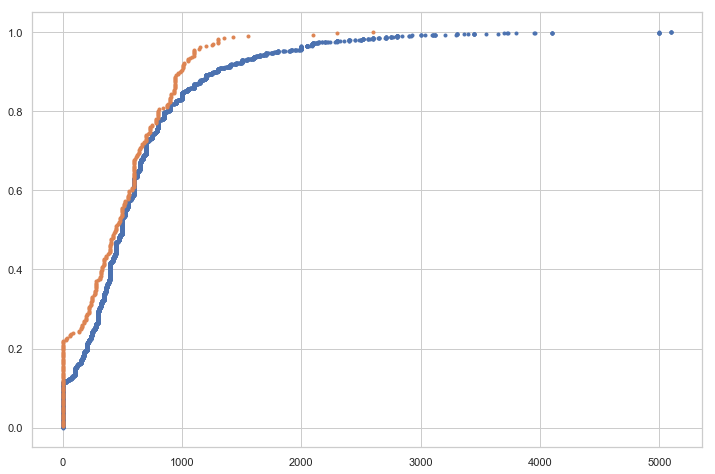

In [120]:
# Calculate the ecdfs from observed data
x_org_0,y_org_0 = ecdf(clothing_df_0.discounted_price)
x_org_1,y_org_1 = ecdf(clothing_df_1.discounted_price)

# plot the original ecdfs based on observed data
_= plt.plot(x_org_0,y_org_0,marker='.',linestyle='none')
_= plt.plot(x_org_1,y_org_1,marker='.',linestyle='none')



In [ ]:
x_org_0,y_org_0 = ecdf(clothing_df_0.discounted_price)
x_org_1,y_org_1 = ecdf(clothing_df_1.discounted_price)

# plot the original ecdfs
_= plt.plot(x_org_0,y_org_0,marker='.',linestyle='none')
_= plt.plot(x_org_1,y_org_1,marker='.',linestyle='none')

# calculate and plot the cdf from permutation samples
plot_perm_ecdf(clothing_df_0.discounted_price,clothing_df_1.discounted_price)

Notice how the permutation sample ECDF's overlap with the observed data, suggesting that the 
hypothesis is commensurate with the data - Discount prices for flipkart advantage products
and non flipkart advantage products are identically distributed.

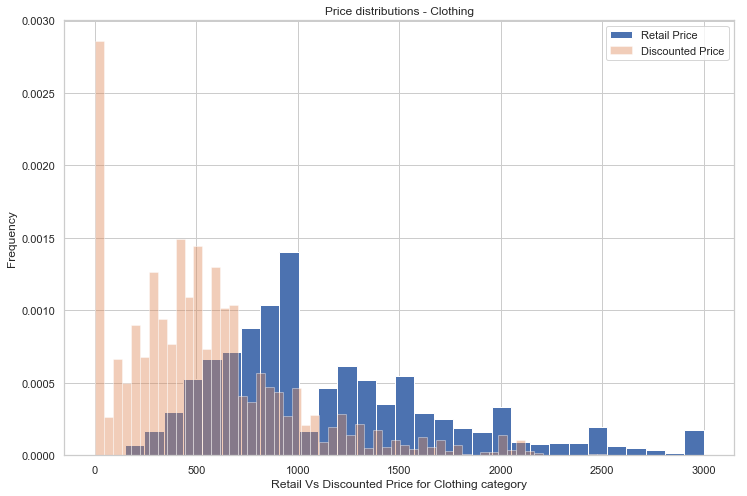

In [122]:
clothing_df=flipkart_df[flipkart_df.product_category_tree.isin(['Clothing'])]
_=plt.hist(clothing_df[clothing_df.retail_price < 3000]['retail_price'],bins=30,density=True,label='Retail Price')
_=plt.hist(clothing_df[clothing_df.retail_price < 3000]['discounted_price'],bins=60,density=True,alpha=0.4,label='Discounted Price')
plt.xlabel('Retail Vs Discounted Price for Clothing category')
plt.ylabel('Frequency')
plt.title('Price distributions - Clothing')
plt.legend()

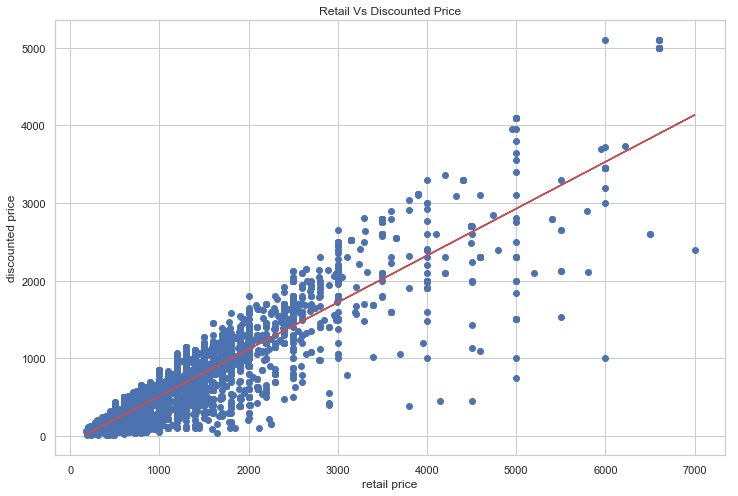

In [123]:
# Did discount percent increase with increase in retail_price ?
# Plot a linear regression with least squares regression : np.polyfit

clothing_df=clothing_df[clothing_df.retail_price < 7000] # For now, excluding the outliers

scatter_df = clothing_df[clothing_df.discounted_price > 0.0]
_ = plt.scatter(scatter_df.retail_price,scatter_df.discounted_price)
slope,intercept = np.polyfit(scatter_df.retail_price,scatter_df.discounted_price,1)
_ = plt.plot(scatter_df.retail_price, slope * scatter_df.retail_price + intercept,linestyle='-',color='r' )
_ = plt.xlabel('retail price')
_ = plt.ylabel('discounted price')
_ = plt.title('Retail Vs Discounted Price')